In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 DATA DISPONIBLE EN: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

In [2]:
path = r'D:\Equipo dinamita\Data-Analysis\First_EDA\Duvan\data\world-data-2023.csv'
data = pd.read_csv(path)

In [3]:
data.head(4)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801


In [4]:
data.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
data.describe()   # Observe que tenemos mas datos en algunas columnas es decir existen NaN

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [6]:
data.info() # los que tienen 195 count están bien, los demás tienen vacios
# a los que son object se reemplaza por la moda, y lo float por el promedio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [7]:
print(type(data['Density\n(P/Km2)'][0]))

<class 'str'>


In [8]:
data['Density\n(P/Km2)'] = data['Density\n(P/Km2)'].astype(str)
data['Density\n(P/Km2)'] = data['Density\n(P/Km2)'].str.replace(",","")
data['Density\n(P/Km2)'] = data['Density\n(P/Km2)'].str.replace("$","")
data['Density\n(P/Km2)'] = data['Density\n(P/Km2)'].str.replace("%","").astype(float)

C:\Users\DUVAN\AppData\Local\Temp\ipykernel_9988\2033295745.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Density\n(P/Km2)'] = data['Density\n(P/Km2)'].str.replace("$","")


In [9]:
print(type(data['Density\n(P/Km2)'][0]))

<class 'numpy.float64'>


In [10]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105.0,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18.0,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164.0,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26.0,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


##### Numerical variables 
Tecnicamente se deberian eliminar los datos NaN, sacar el promedio y ver si hay datos atipicos eliminar los datos atipicos
una vez eliminados los datos atipicos calcular el promedio, volver al dataset original reemplazarlos por el promedio encontrado
y eliminar del dataset original los datos atipicos.

In [11]:
data['Birth Rate'].fillna( data['Birth Rate'].mean() ,inplace = True)
data['Calling Code'].fillna( data['Calling Code'].mean() ,inplace = True)
data['Fertility Rate'].fillna( data['Fertility Rate'].mean() ,inplace = True)
data['Infant mortality'].fillna( data['Infant mortality'].mean() ,inplace = True)
data['Life expectancy'].fillna( data['Life expectancy'].mean() ,inplace = True)
data['Maternal mortality ratio'].fillna(data['Maternal mortality ratio'].mean() ,inplace = True)
data['Physicians per thousand'].fillna(data['Physicians per thousand'].mean() ,inplace = True)
data['Latitude'].fillna( data['Latitude'].mean() ,inplace = True)
data['Longitude'].fillna( data['Longitude'].mean() ,inplace = True)

Text(0.5, 1.0, 'Longitude')

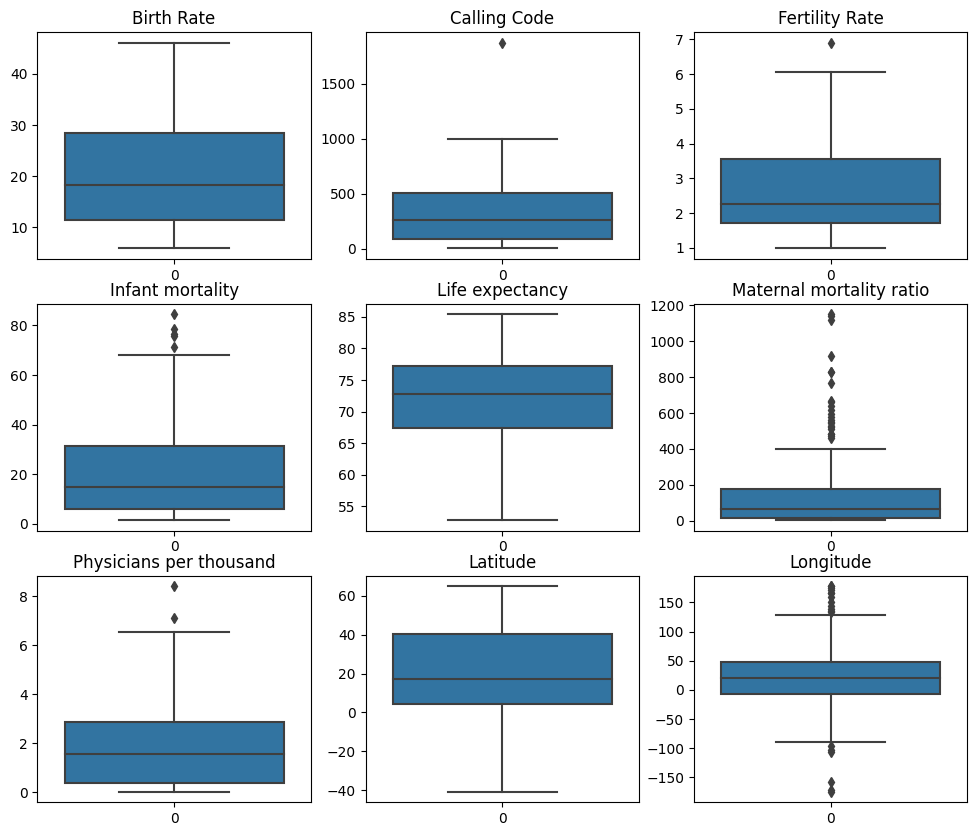

In [12]:
fig, ax = plt.subplots(3,3,figsize=(12,10))

sns.boxplot(data['Birth Rate'], ax = ax[0,0])
ax[0, 0].set_title('Birth Rate')
sns.boxplot(data['Calling Code'], ax = ax[0,1])
ax[0, 1].set_title('Calling Code')
sns.boxplot(data['Fertility Rate'], ax = ax[0,2])
ax[0, 2].set_title('Fertility Rate')


sns.boxplot(data['Infant mortality'], ax = ax[1,0])
sns.boxplot(data['Life expectancy'], ax = ax[1,1])
sns.boxplot(data['Maternal mortality ratio'], ax = ax[1,2])
ax[1, 0].set_title('Infant mortality')
ax[1, 1].set_title('Life expectancy')
ax[1, 2].set_title('Maternal mortality ratio')

sns.boxplot(data['Physicians per thousand'], ax = ax[2,0])
sns.boxplot(data['Latitude'], ax = ax[2,1])
sns.boxplot(data['Longitude'], ax = ax[2,2])
ax[2, 0].set_title('Physicians per thousand')
ax[2, 1].set_title('Latitude')
ax[2, 2].set_title('Longitude')
## Longitud y latitud no tiene sentido eliminar campos fuera del promedio, porque no llevan una tendencia creo

In [13]:
data_corr = data[['Birth Rate','Calling Code','Fertility Rate','Infant mortality','Life expectancy','Maternal mortality ratio','Physicians per thousand','Latitude','Longitude']]

<AxesSubplot: >

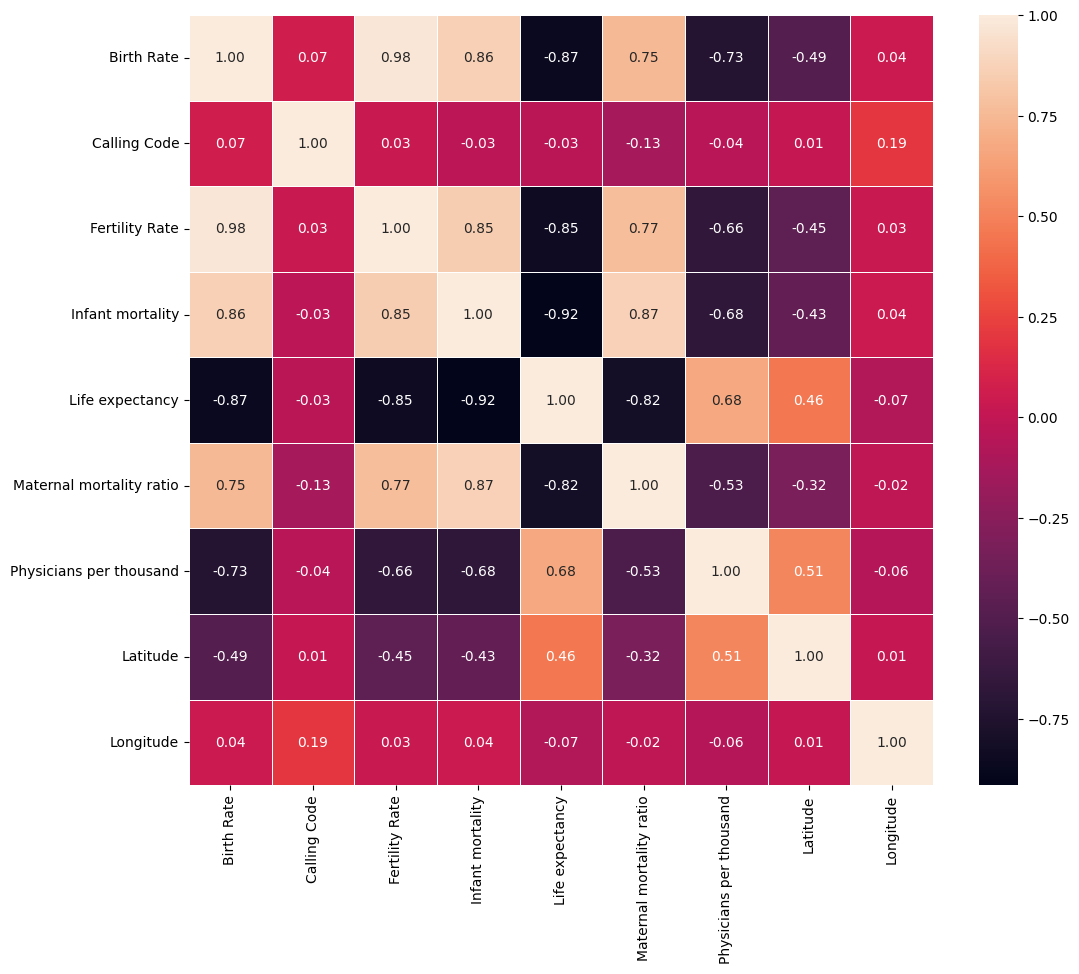

In [14]:
corr_variable = data_corr.corr()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_variable,annot=True, fmt=".2f", linewidths=.5, ax=ax)

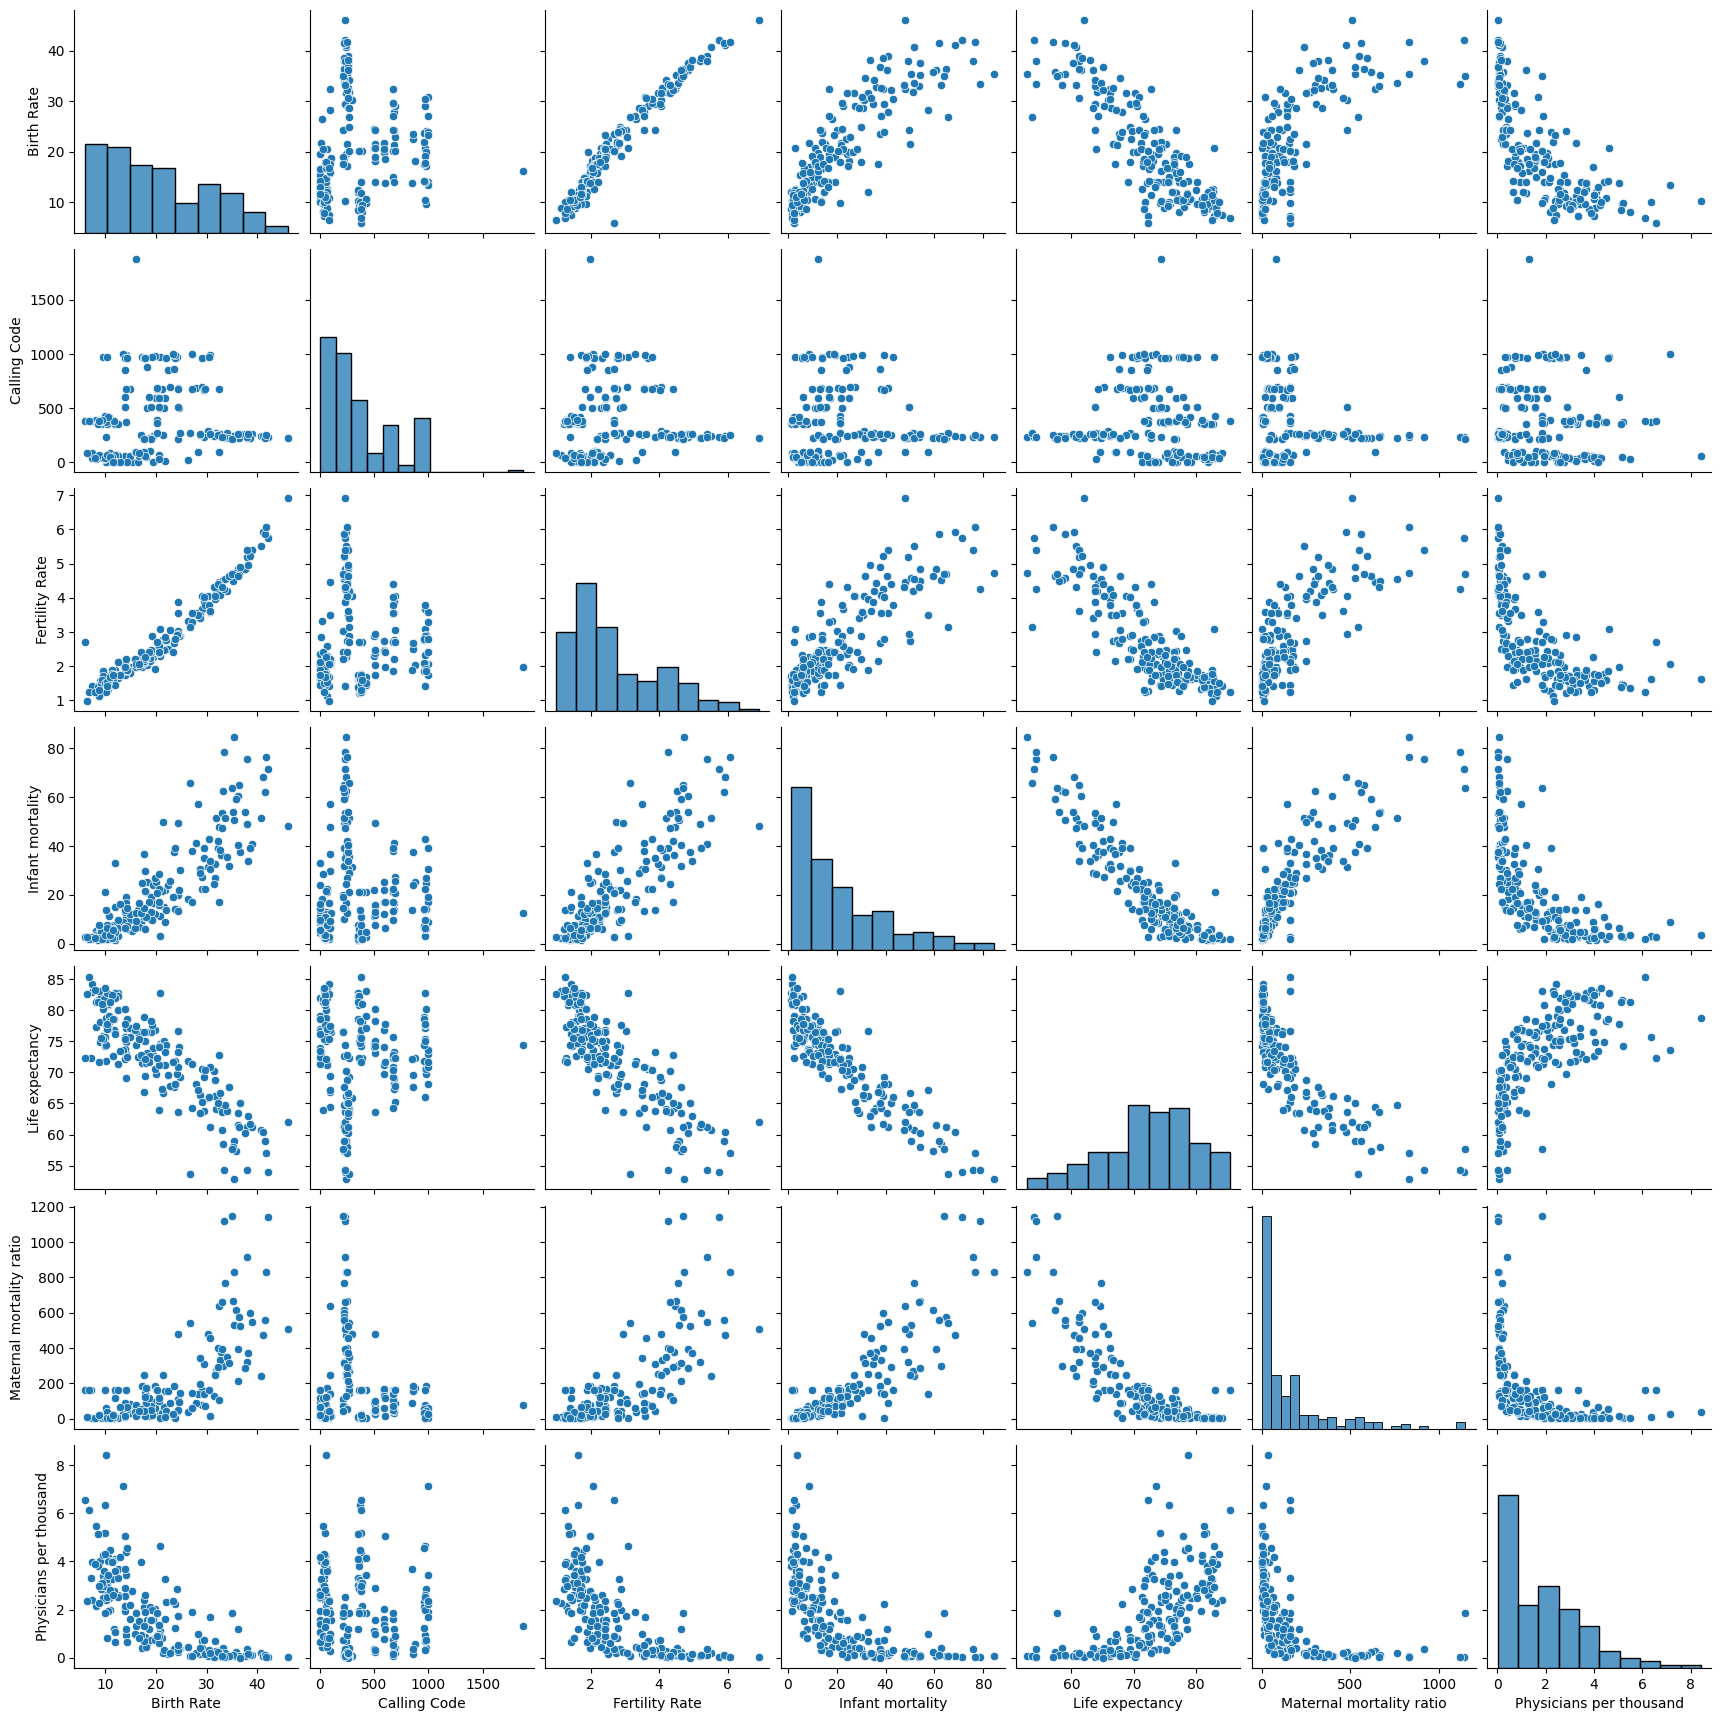

In [15]:
data_pairplot = data[['Birth Rate','Calling Code','Fertility Rate','Infant mortality','Life expectancy','Maternal mortality ratio','Physicians per thousand']]
#fig, ax = plt.subplots(figsize=(12,10))
sns.pairplot(data_pairplot)

In [16]:
def filter_data_to_quantiles(data):
    percentil_25 = data.quantile(0.25)
    percentil_75 = data.quantile(0.75)
    
    rango_intercuartilico = percentil_75 - percentil_25
    
    umbral_inferior = percentil_25 - 1.5 * rango_intercuartilico
    umbral_superior = percentil_75 + 1.5 * rango_intercuartilico
    datos_filtrados = data[(data >= umbral_inferior) & (data <= umbral_superior)]

    return datos_filtrados

In [17]:
data['Birth Rate'] = filter_data_to_quantiles(data['Birth Rate'])
data['Calling Code'] = filter_data_to_quantiles(data['Calling Code'])
data['Fertility Rate'] = filter_data_to_quantiles(data['Fertility Rate'])
data['Infant mortality'] = filter_data_to_quantiles(data['Infant mortality'])
data['Life expectancy'] = filter_data_to_quantiles(data['Life expectancy'])
data['Maternal mortality ratio'] = filter_data_to_quantiles(data['Maternal mortality ratio'])
data['Physicians per thousand'] = filter_data_to_quantiles(data['Physicians per thousand'])

Text(0.5, 1.0, 'Longitude')

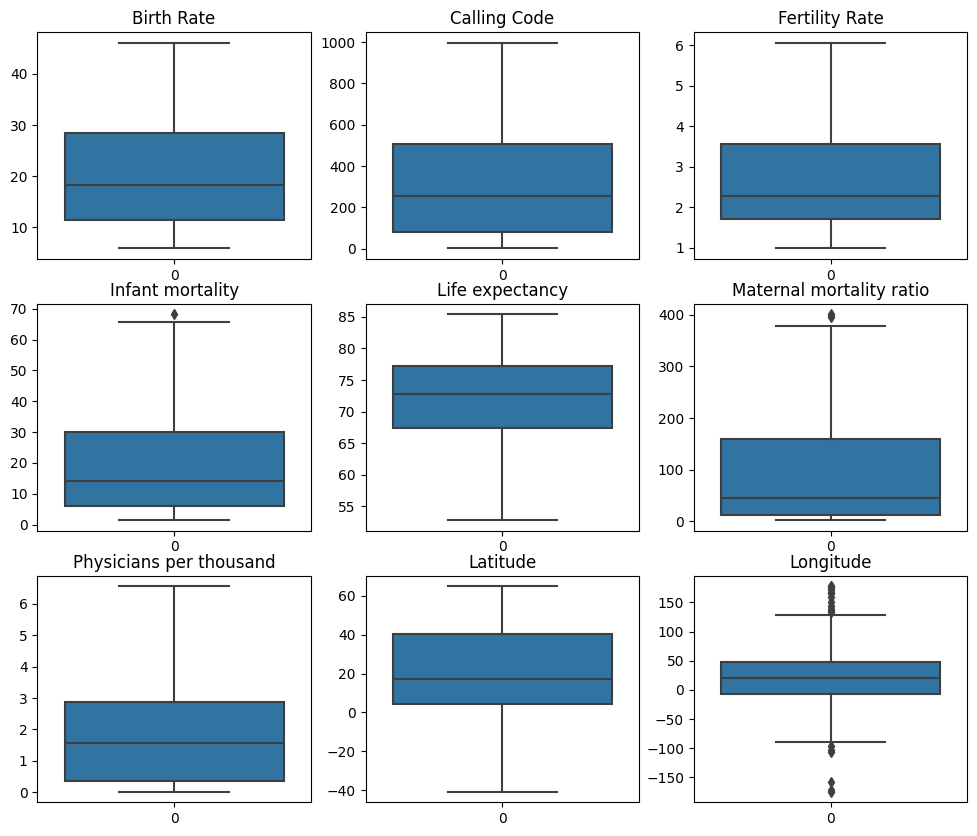

In [18]:
fig, ax = plt.subplots(3,3,figsize=(12,10))

sns.boxplot(data['Birth Rate'], ax = ax[0,0])
ax[0, 0].set_title('Birth Rate')
sns.boxplot(data['Calling Code'], ax = ax[0,1])
ax[0, 1].set_title('Calling Code')
sns.boxplot(data['Fertility Rate'], ax = ax[0,2])
ax[0, 2].set_title('Fertility Rate')


sns.boxplot(data['Infant mortality'], ax = ax[1,0])
sns.boxplot(data['Life expectancy'], ax = ax[1,1])
sns.boxplot(data['Maternal mortality ratio'], ax = ax[1,2])
ax[1, 0].set_title('Infant mortality')
ax[1, 1].set_title('Life expectancy')
ax[1, 2].set_title('Maternal mortality ratio')

sns.boxplot(data['Physicians per thousand'], ax = ax[2,0])
sns.boxplot(data['Latitude'], ax = ax[2,1])
sns.boxplot(data['Longitude'], ax = ax[2,2])
ax[2, 0].set_title('Physicians per thousand')
ax[2, 1].set_title('Latitude')
ax[2, 2].set_title('Longitude')

In [19]:

data_dic = {
  'Birth Rate':  data['Birth Rate'],
  'Calling Code':  data['Calling Code'],
  'Fertility Rate':  data['Fertility Rate'],
  'Infant mortality': data['Infant mortality'],
  'Life expectancy':  data['Life expectancy'],
  'Maternal mortality ratio': data['Maternal mortality ratio'],
  'Physicians per thousand':  data['Physicians per thousand']
}

data_list = pd.DataFrame(data_dic)

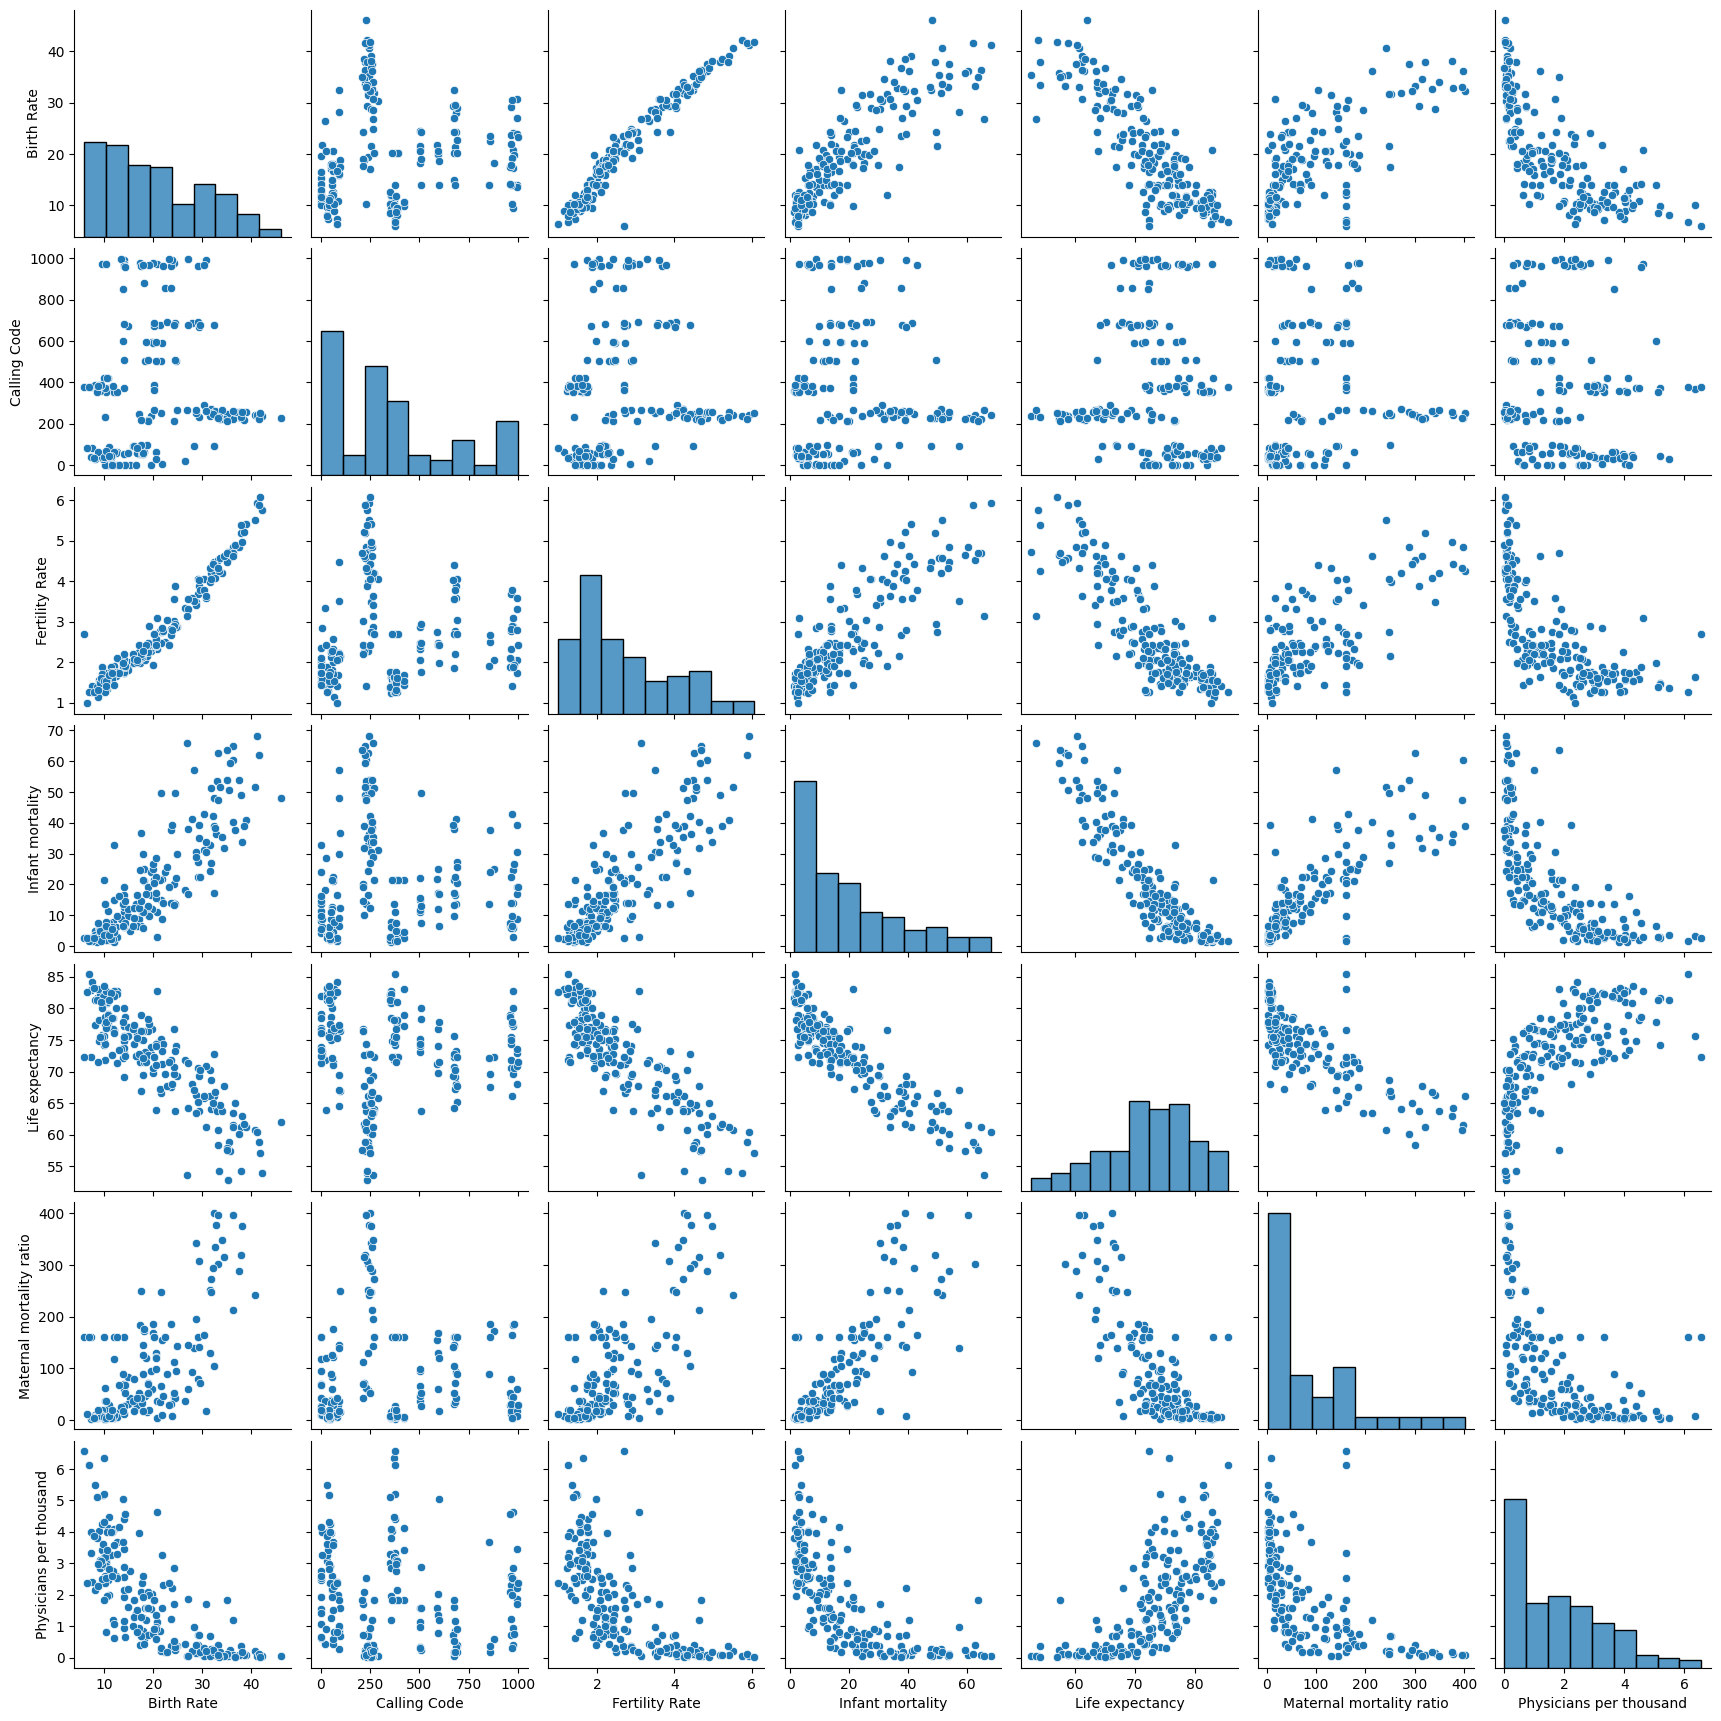

In [20]:
sns.pairplot(data_list)

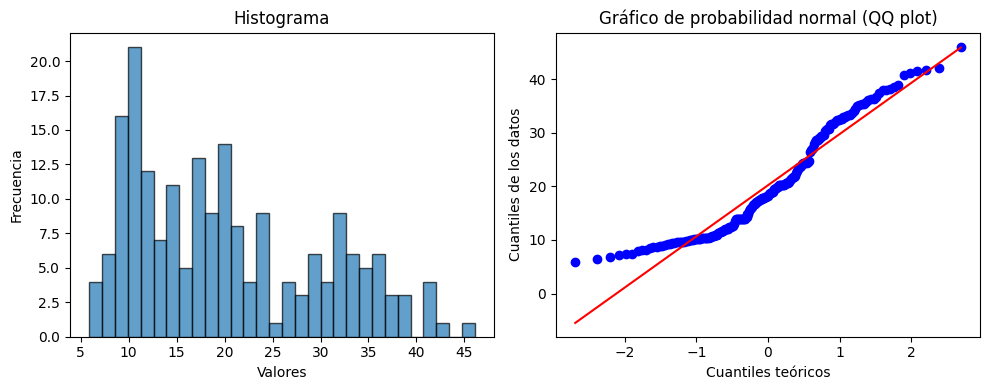

In [21]:
import scipy.stats as stats

# Gráfico de histograma
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['Birth Rate'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')

# Gráfico de probabilidad normal (QQ plot)
plt.subplot(1, 2, 2)
stats.probplot(data['Birth Rate'], dist='norm', plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.title('Gráfico de probabilidad normal (QQ plot)')

# Ajusta el espaciado entre subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


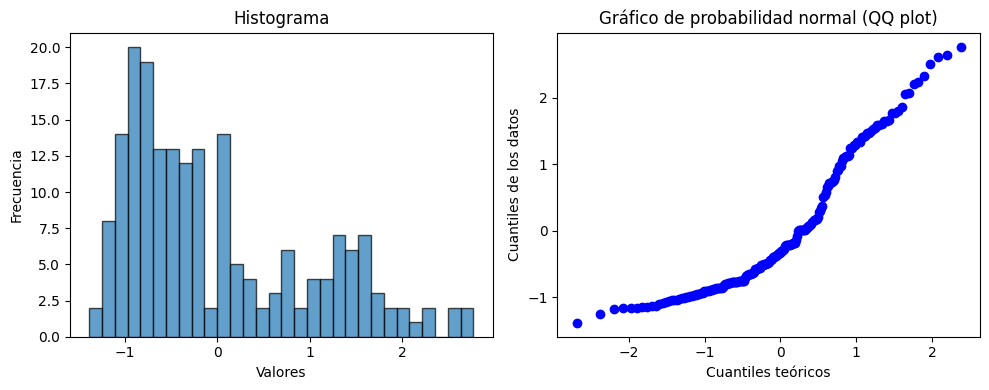

In [24]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['Fertility Rate'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')

# Gráfico de probabilidad normal (QQ plot)
plt.subplot(1, 2, 2)
stats.probplot(data['Fertility Rate'], dist='norm', plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.title('Gráfico de probabilidad normal (QQ plot)')

# Ajusta el espaciado entre subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show() 

In [30]:
data['Fertility Rate'] = (data['Fertility Rate'] - data['Fertility Rate'].mean())/(data['Fertility Rate'].std())

In [35]:
data['Fertility Rate'] = data['Fertility Rate']/np.max(data['Fertility Rate'])

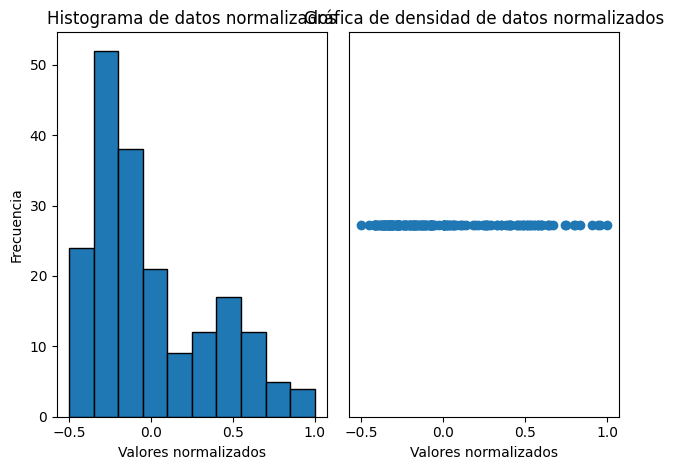

In [36]:
plt.subplot(1, 2, 1)
plt.hist(data['Fertility Rate'], bins=10, edgecolor='black')
plt.title('Histograma de datos normalizados')
plt.xlabel('Valores normalizados')
plt.ylabel('Frecuencia')

# Crear gráfica de densidad
plt.subplot(1, 2, 2)
plt.plot(data['Fertility Rate'], np.zeros_like(data['Fertility Rate']), 'o')
plt.title('Gráfica de densidad de datos normalizados')
plt.xlabel('Valores normalizados')
plt.yticks([])

plt.tight_layout()
plt.show()



